## Importing Necessary Libraries

In [42]:
import os
import gdown
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Downloading the data from google drive using gdown

In [43]:
!gdown https://drive.google.com/uc?id=1NDpJ3UxH2URvNaxMLDe5uSgYIXvu-1tl

Downloading...
From: https://drive.google.com/uc?id=1NDpJ3UxH2URvNaxMLDe5uSgYIXvu-1tl
To: /content/Sales.csv
100% 131k/131k [00:00<00:00, 85.0MB/s]


## Loading the data in pandas dataframe from csv file

In [44]:
df = pd.read_csv('Sales.csv')
print(df.shape)
df.head()

(1000, 17)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/2019,10:29,NaN,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Check the column information

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               990 non-null    object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               998 non-null    float64
 7   Quantity                 984 non-null    float64
 8   Tax 5%                   986 non-null    float64
 9   Total                    986 non-null    float64
 10  Date                     1000 non-null   object 
 11  Time                     999 non-null    object 
 12  Payment                  997 non-null    object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### Checking the number of rows and columns in the dataset using shape attribute.

In [46]:
df.shape

(1000, 17)

### Finding the names of columns of the data

In [47]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

## Insights From First Glance

<li>There are 1000 rows and 17 columns.</li>


## Data Wrangling

- Data Collection
- Data Inspection
- Data Cleaning
  - Handling Missing Values
  - Removing Duplicates
  - Standardizing Formats
  - Correcting Errors


## Data Inspection
**- Checking duplicate entries**

In [48]:
df[df.duplicated()]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


<li>There are no duplicate entries in the dataset.</li>

**- Checking missing values**

In [49]:
df.isnull().sum()

Invoice ID                 10
Branch                      0
City                        0
Customer type               0
Gender                      0
Product line                0
Unit price                  2
Quantity                   16
Tax 5%                     14
Total                      14
Date                        0
Time                        1
Payment                     3
cogs                        0
gross margin percentage    29
gross income                0
Rating                      0
dtype: int64

### Visualizing missing values using heatmap

<Axes: >

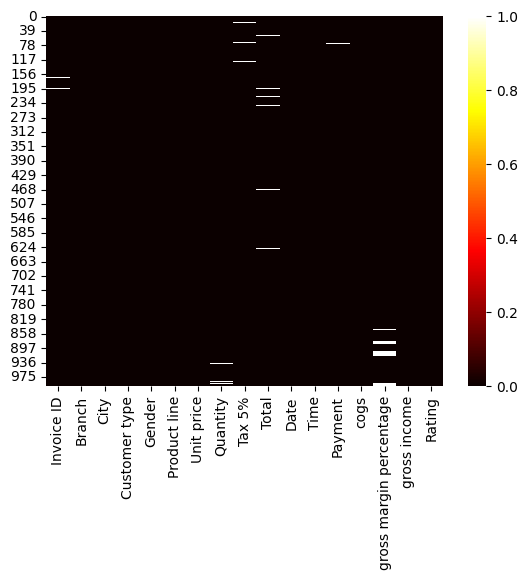

In [50]:
sns.heatmap(data =df.isnull(), cmap = 'hot')

## Handling Missing Values

### Missing Value IN Invoice Id

In [51]:
df.loc[df['Invoice ID'].isnull()]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
165,NaN,B,Mandalay,Member,Male,Health and beauty,42.57,8.0,17.0280,357.5880,2/25/2019,14:12,Ewallet,340.56,4.761905,17.0280,5.6
166,NaN,C,Naypyitaw,Normal,Male,Home and lifestyle,95.58,10.0,47.7900,1003.5900,1/16/2019,13:32,Cash,955.80,4.761905,47.7900,4.8
195,NaN,C,Naypyitaw,Member,Female,Fashion accessories,74.29,1.0,3.7145,NaN,1/13/2019,19:30,Cash,74.29,4.761905,3.7145,5.0
221,NaN,B,Mandalay,Normal,Male,Food and beverages,62.08,7.0,21.7280,456.2880,3/6/2019,13:46,Ewallet,434.56,4.761905,21.7280,5.4
245,NaN,A,Yangon,Member,Male,Home and lifestyle,47.59,8.0,19.0360,399.7560,1/1/2019,14:47,Cash,380.72,4.761905,19.0360,5.7
269,NaN,A,Yangon,Member,Female,Home and lifestyle,35.54,10.0,17.7700,373.1700,1/4/2019,13:34,Ewallet,355.40,4.761905,17.7700,7.0
296,NaN,C,Naypyitaw,Normal,Male,Electronic accessories,28.84,4.0,5.7680,121.1280,3/29/2019,14:44,Cash,115.36,4.761905,5.7680,6.4
323,NaN,A,Yangon,Normal,Female,Fashion accessories,61.77,5.0,15.4425,324.2925,3/8/2019,13:21,Cash,308.85,4.761905,15.4425,6.7
350,NaN,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10.0,49.6500,1042.6500,2/15/2019,14:53,Credit card,993.00,4.761905,49.6500,6.6
377,NaN,C,Naypyitaw,Normal,Male,Sports and travel,95.49,7.0,33.4215,701.8515,2/22/2019,18:17,Ewallet,668.43,4.761905,33.4215,8.7


In [52]:
df['Invoice ID'].nunique()

990

<b><li>There are 10 missing values in Invoice Id and rest of them are all unique.</li></b>

### Creating a function that can generate random invoice ids using random number generation.

In [53]:
import random

In [54]:
def create_unique_invoice_id():
  first_three = [random.randint(100, 999) for i in range(10)]
  between_two = [random.randint(1, 99) for i in range(10)]
  last_three = [random.randint(100, 999) for i in range(10)]
  invoice_no = [str(first_three[i]) + "-"  + str(between_two[i]) + "-" + str(last_three[i]) for i in range(10)]
  return invoice_no


In [55]:
df.loc[df['Invoice ID'].isnull(), 'Invoice ID'] = create_unique_invoice_id()

In [56]:
df.isnull().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type               0
Gender                      0
Product line                0
Unit price                  2
Quantity                   16
Tax 5%                     14
Total                      14
Date                        0
Time                        1
Payment                     3
cogs                        0
gross margin percentage    29
gross income                0
Rating                      0
dtype: int64

## Missing values in Unit Price

In [57]:
df.loc[df['Unit price'].isnull()]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,NaN,10.0,36.780,772.380,2/24/2019,11:38,Ewallet,735.6,4.761905,36.780,8.0
409,372-26-1506,C,Naypyitaw,Normal,Female,Fashion accessories,NaN,5.0,5.955,125.055,1/28/2019,19:24,Ewallet,119.1,4.761905,5.955,5.4


### We can calculate the unit price by using a formula:

<code>
(Total price - Tax amount)/ Quantity
</code>

### Applying this formula to fill in missing unit prices

In [58]:
df.loc[df['Unit price'].isnull(), "Unit price"] = (df['Total'] - df['Tax 5%'])/df['Quantity']

In [59]:
df.iloc[409, :]

Invoice ID                         372-26-1506
Branch                                       C
City                                 Naypyitaw
Customer type                           Normal
Gender                                  Female
Product line               Fashion accessories
Unit price                               23.82
Quantity                                   5.0
Tax 5%                                   5.955
Total                                  125.055
Date                                 1/28/2019
Time                                     19:24
Payment                                Ewallet
cogs                                     119.1
gross margin percentage               4.761905
gross income                             5.955
Rating                                     5.4
Name: 409, dtype: object

### Handling missing values in Quantity column

In [60]:
df.loc[df['Quantity'].isnull()].head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
720,418-05-0656,B,Mandalay,Normal,Female,Fashion accessories,25.56,NaN,8.946,187.866,2/2/2019,20:42,Cash,178.92,4.761905,8.946,7.1
845,804-38-3935,A,Yangon,Member,Male,Electronic accessories,93.78,NaN,14.067,295.407,1/30/2019,11:32,Credit card,281.34,4.761905,14.067,5.9
853,866-70-2814,B,Mandalay,Normal,Female,Electronic accessories,52.79,NaN,26.395,554.295,2/25/2019,11:58,Ewallet,527.90,4.761905,26.395,10.0
867,101-81-4070,C,Naypyitaw,Member,Female,Health and beauty,62.82,NaN,6.282,131.922,1/17/2019,12:36,Ewallet,125.64,4.761905,6.282,4.9
907,851-98-3555,B,Mandalay,Normal,Female,Health and beauty,82.88,NaN,20.720,435.120,3/24/2019,14:08,Credit card,414.40,NaN,20.720,6.6


### We can calculate the missing quantities by using a formula:

<code>
Quantity = (Total - Tax amount)// Unit Price
</code>

### Applying this formula to fill in the missing values in Quantity column.

In [61]:
df.loc[df['Quantity'].isnull(), "Quantity"] = (df['Total'] - df['Tax 5%'])//df['Unit price']

### Handling missing value in Total Column

In [62]:
df.loc[df['Total'].isnull(), ['Unit price', 'Quantity', 'Tax 5%', 'Total']]

,Unit price,Quantity,Tax 5%,Total
28,88.36,5.0,22.0900,NaN
51,44.59,5.0,11.1475,NaN
102,23.07,9.0,10.3815,NaN
147,66.14,4.0,13.2280,NaN
171,80.05,5.0,20.0125,NaN
195,74.29,1.0,3.7145,NaN
216,24.77,5.0,6.1925,NaN
240,24.94,9.0,11.2230,NaN
264,54.45,1.0,2.7225,NaN
288,48.51,7.0,16.9785,NaN


### Calculating the Total Price by using a formula:

<code>
Total Price = Unit Price * Quantity
</code>

### Using this formula, we can fill in the missing values in Total Column when unit price and quantities are known.

In [63]:
df.loc[df['Total'].isnull(), "Total"] = (df['Unit price'] * df['Quantity'])  + df['Tax 5%']

### Handling Missing Values For Tax column

In [64]:
df.loc[df['Tax 5%'].isnull(), ['Unit price', 'Quantity', 'Tax 5%', 'Total']]

,Unit price,Quantity,Tax 5%,Total
15,93.72,6.0,NaN,590.4360
16,68.93,7.0,NaN,506.6355
17,72.61,6.0,NaN,457.4430
70,89.48,10.0,NaN,939.5400
71,62.12,10.0,NaN,652.2600
72,48.52,3.0,NaN,152.8380
96,87.87,10.0,NaN,922.6350
121,57.12,7.0,NaN,419.8320
139,72.50,8.0,NaN,609.0000
160,43.18,8.0,NaN,362.7120


### Filling missing values in tax column by using a formula:

<code>
Tax amount = Total amount - (Unit Price * Quantity)
</code>

### This will give us tax amount which can be used to fill in missing values in tax column when total amount, unit prices and quantity are known.


In [65]:
df.loc[df['Tax 5%'].isnull(), "Tax 5%"] = df['Total'] - (df["Unit price"] * df['Quantity'])

In [66]:
df.iloc[461, ]

Invoice ID                        234-03-4040
Branch                                      B
City                                 Mandalay
Customer type                          Member
Gender                                 Female
Product line               Food and beverages
Unit price                              73.05
Quantity                                 10.0
Tax 5%                                 36.525
Total                                 767.025
Date                                 3/3/2019
Time                                    12:25
Payment                           Credit card
cogs                                    730.5
gross margin percentage              4.761905
gross income                           36.525
Rating                                    8.7
Name: 461, dtype: object

### Checking Null Values Again

In [67]:
df.isnull().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type               0
Gender                      0
Product line                0
Unit price                  0
Quantity                    0
Tax 5%                      0
Total                       0
Date                        0
Time                        1
Payment                     3
cogs                        0
gross margin percentage    29
gross income                0
Rating                      0
dtype: int64

### Checking Missing Values in Time column

In [68]:
df[df['Time'].isnull()]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1.0,1.592,33.432,2/9/2019,NaN,Cash,31.84,NaN,1.592,7.7


**To address missing values in the time column, we'll fill them with the mode value for sales in the "Food and Beverages" product line as missing value also falls under "Food and Beverages" product line.**



In [69]:
df.loc[df['Product line'] == "Food and beverages", "Time"].mode()[0]

'20:29'

In [70]:
df.loc[df["Time"].isnull(), "Time"] = df.loc[df['Product line'] == "Food and beverages", "Time"].mode()[0]

### Checking missing values to verify null value for time has been filled

In [71]:
df.isnull().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type               0
Gender                      0
Product line                0
Unit price                  0
Quantity                    0
Tax 5%                      0
Total                       0
Date                        0
Time                        0
Payment                     3
cogs                        0
gross margin percentage    29
gross income                0
Rating                      0
dtype: int64

### Checking missing values in Payment columns

In [72]:
df[df['Payment'].isnull()]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.820,80.220,3/8/2019,10:29,NaN,76.40,4.761905,3.820,9.6
28,145-94-9061,B,Mandalay,Normal,Female,Food and beverages,88.36,5.0,22.090,463.890,1/25/2019,19:48,NaN,441.80,4.761905,22.090,9.6
73,841-35-6630,C,Naypyitaw,Normal,Female,Electronic accessories,75.91,6.0,22.773,478.233,3/9/2019,18:21,NaN,455.46,4.761905,22.773,8.7


In [73]:
df['Payment'].value_counts()

Payment
Ewallet        345
Cash           341
Credit card    311
Name: count, dtype: int64

### Filling the missing values in Payment column with the mode of the column

In [74]:
df.loc[df['Payment'].isnull(), 'Payment'] = df['Payment'].mode()[0]

### Filling Missing values in gross margin percentage

In [75]:
df.loc[df['gross margin percentage'].isnull(),
 ['Total', 'gross income', 'gross margin percentage']]

,Total,gross income,gross margin percentage
847,23.4990,1.1190,NaN
856,177.4080,8.4480,NaN
879,101.6400,4.8400,NaN
880,348.7050,16.6050,NaN
881,85.5120,4.0720,NaN
882,335.8950,15.9950,NaN
883,216.8460,10.3260,NaN
884,175.0140,8.3340,NaN
885,335.0130,15.9530,NaN
905,329.1960,15.6760,NaN


#### Checking the distribution of gross margin percentage

In [76]:
df['gross margin percentage'].value_counts()

gross margin percentage
4.761905    971
Name: count, dtype: int64

### Since all of the gross margin percentage are equal so filling the missing values in this column with the same value.

In [77]:
df.loc[df['gross margin percentage'].isnull(), 'gross margin percentage'] = 4.761905

## Checking missing values again

In [78]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

## Let's explore each column one by one

## EDA
- Univariate Analysis: Study of one variable at a time
- Bivariate Analysis: Study of two or more than two variables at a time


In [79]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
branch_df = df['Branch'].value_counts().reset_index()
branch_df

,Branch,count
0,A,340
1,B,332
2,C,328


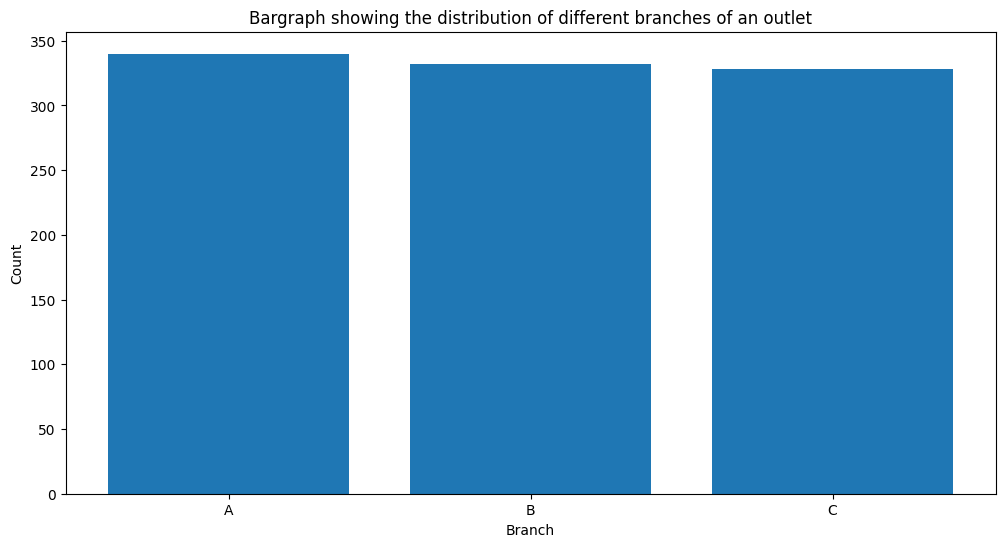

In [ ]:
plt.figure(figsize = (12, 6))
plt.bar(x = branch_df['Branch'], height = branch_df['count'])
plt.title("Bargraph showing the distribution of different branches of an outlet")
plt.xlabel("Branch")
plt.ylabel("Count")
plt.show()

In [ ]:
df['Branch'].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

In [ ]:
df['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

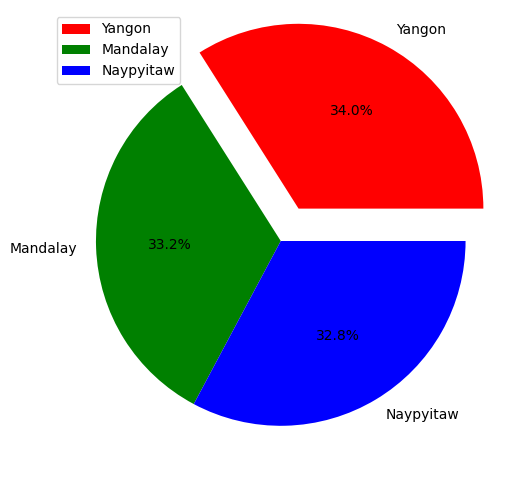

In [ ]:
city_df = df['City'].value_counts().reset_index()
plt.figure(figsize = (10, 6))
plt.pie(city_df['count'], explode = (0.2,0,0),
        colors = ["red", 'green', 'blue'], labels = city_df['City'],
        autopct = "%.1f%%")
plt.legend()
plt.show()

In [ ]:
df['Customer type'].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

In [ ]:
customer_type_df = df['Customer type'].value_counts().reset_index()

<ipython-input-326-51a82549ea06>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = customer_type_df, x = 'Customer type',


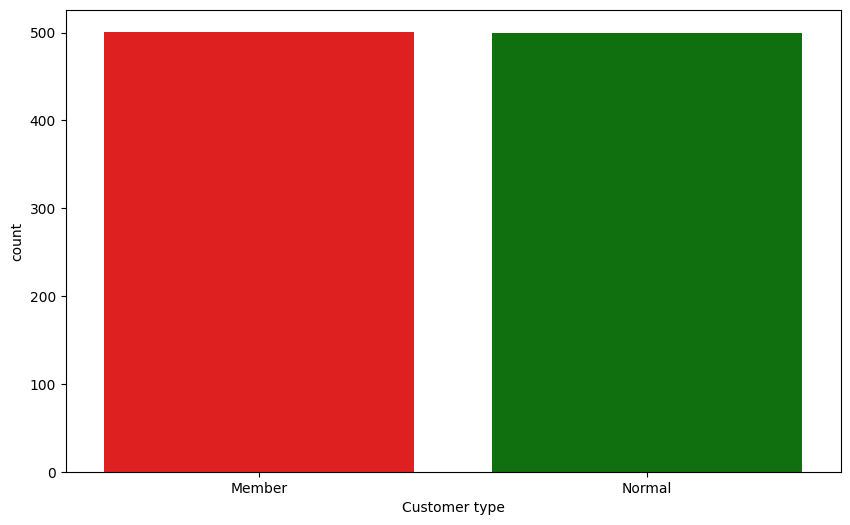

In [ ]:
plt.figure(figsize = (10, 6))
sns.barplot(data = customer_type_df, x = 'Customer type',
            y = 'count', palette = ['red', 'green'])
plt.show()

In [ ]:
df['Gender'].value_counts()

Gender
Female    501
Male      499
Name: count, dtype: int64

In [ ]:
gender_df = df['Gender'].value_counts().reset_index()

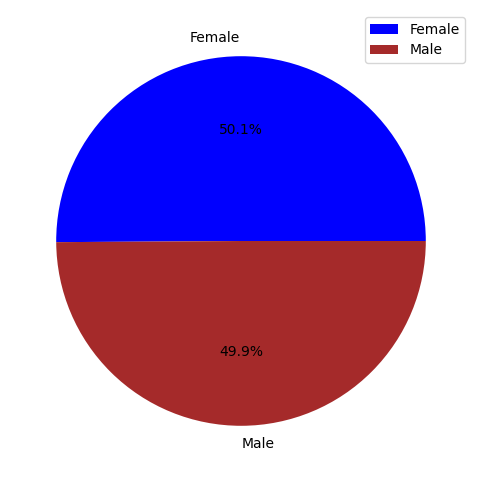

In [ ]:
plt.figure(figsize = (12, 6))
plt.pie(x = gender_df['count'],
        labels = gender_df['Gender'],
        colors = ['blue', 'brown'],
        autopct = "%.1f%%")
plt.legend()
plt.show()

In [ ]:
df['Product line'].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

## Unit price distribution

<ipython-input-332-dba0b89aec67>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Unit price'])


<Axes: xlabel='Unit price', ylabel='Density'>

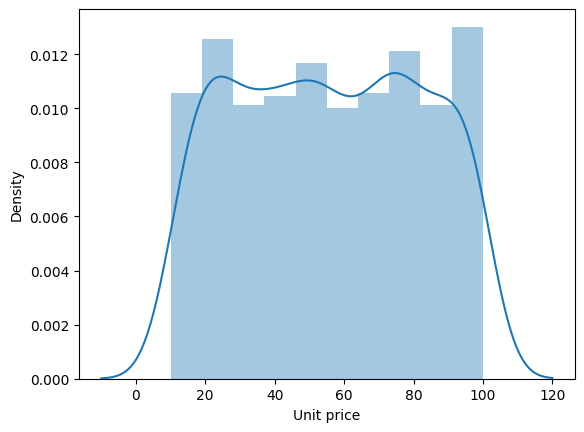

In [ ]:
sns.distplot(df['Unit price'])

<Axes: xlabel='Unit price', ylabel='Density'>

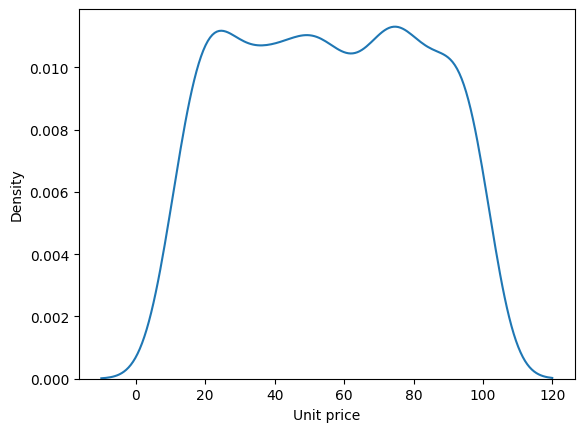

In [ ]:
sns.kdeplot(df['Unit price'])

<Axes: ylabel='Unit price'>

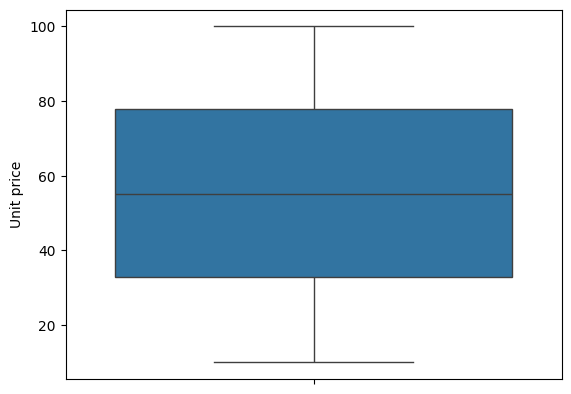

In [ ]:
sns.boxplot(df['Unit price'])

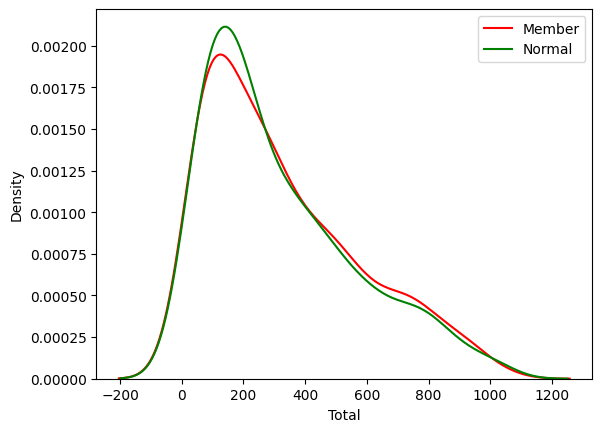

In [ ]:
sns.kdeplot(df.loc[df['Customer type'] == "Member", "Total"], color = 'red',
            label = "Member")
sns.kdeplot(df.loc[df['Customer type'] == "Normal", "Total"], color = 'green',
            label = "Normal")
plt.legend()

In [ ]:
df['Customer type']

0      Member
1      Normal
2      Normal
3      Member
4      Normal
        ...  
995    Normal
996    Normal
997    Member
998    Normal
999    Member
Name: Customer type, Length: 1000, dtype: object

## What product lines exhibit the highest appeal among female consumers?


In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
product_choices = df[['Gender', 'Product line']].value_counts().reset_index()
product_choices

,Gender,Product line,count
0,Female,Fashion accessories,96
1,Female,Food and beverages,90
2,Female,Sports and travel,88
3,Male,Health and beauty,88
4,Male,Electronic accessories,86
5,Female,Electronic accessories,84
6,Male,Food and beverages,84
7,Male,Fashion accessories,82
8,Male,Home and lifestyle,81
9,Female,Home and lifestyle,79


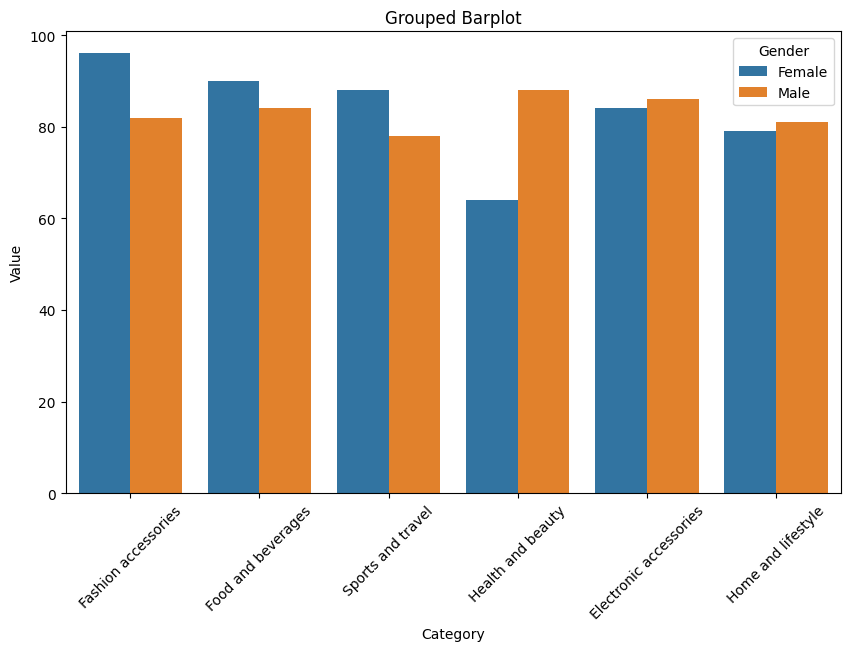

In [ ]:
# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=product_choices, x='Product line', y='count', hue='Gender')
plt.title('Grouped Barplot')
plt.xlabel('Category')
plt.ylabel('Value')
plt.xticks(rotation = 45)
plt.show()


## Which products are purchased by which cities?

In [ ]:
product_pop_by_city = df[['Product line', 'City']].value_counts().reset_index()
product_pop_by_city

,Product line,City,count
0,Food and beverages,Naypyitaw,66
1,Fashion accessories,Naypyitaw,65
2,Home and lifestyle,Yangon,65
3,Fashion accessories,Mandalay,62
4,Sports and travel,Mandalay,62
5,Electronic accessories,Yangon,60
6,Sports and travel,Yangon,59
7,Food and beverages,Yangon,58
8,Electronic accessories,Naypyitaw,55
9,Electronic accessories,Mandalay,55


(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70')])

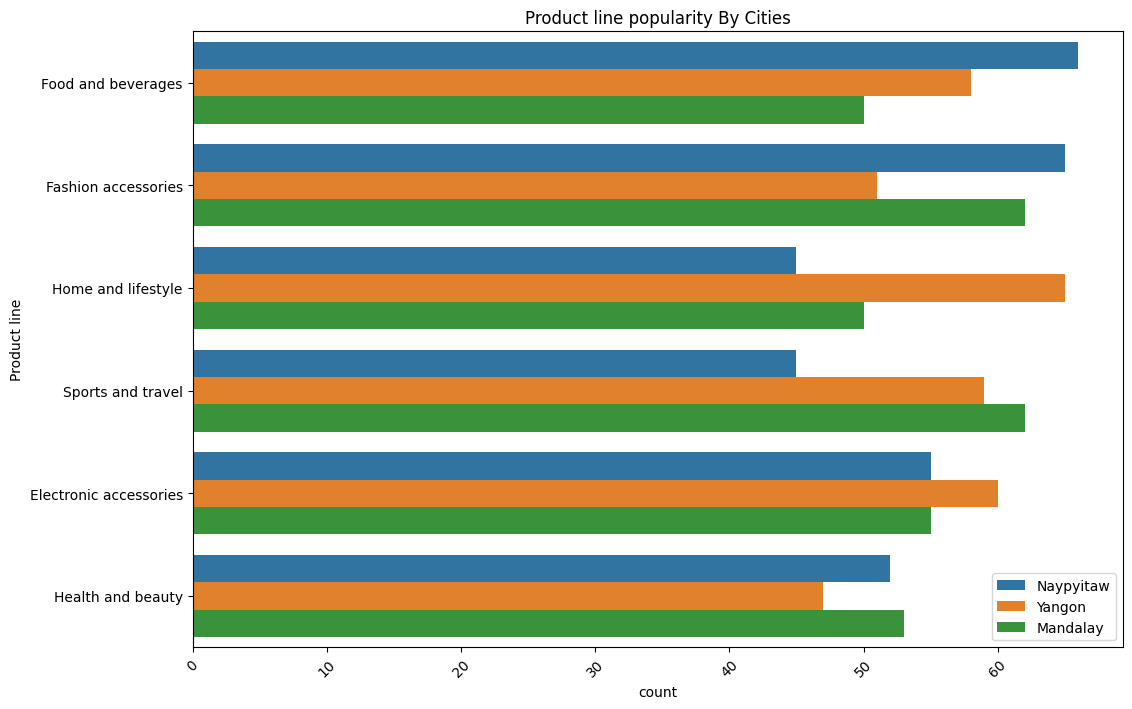

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(data = product_pop_by_city,
            y = 'Product line', x= 'count',
            orient = 'horizontal',
            hue = 'City',
            )
plt.title('Product line popularity By Cities')
plt.legend()
plt.xticks(rotation = 45)

## Which branch sales has the highest ratings?

In [ ]:
df['Branch'].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

In [ ]:
df.groupby('Branch')['Rating'].mean()

Branch
A    7.027059
B    6.818072
C    7.072866
Name: Rating, dtype: float64

## Branch C has got the highest ratings interms of sales.


In [ ]:
df['Rating'].value_counts()

Rating
6.0     26
6.6     24
4.2     22
9.5     22
6.5     21
        ..
4.0     11
5.3     11
8.3     11
4.6      8
10.0     5
Name: count, Length: 61, dtype: int64

In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

## Polluting the data

In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')